In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

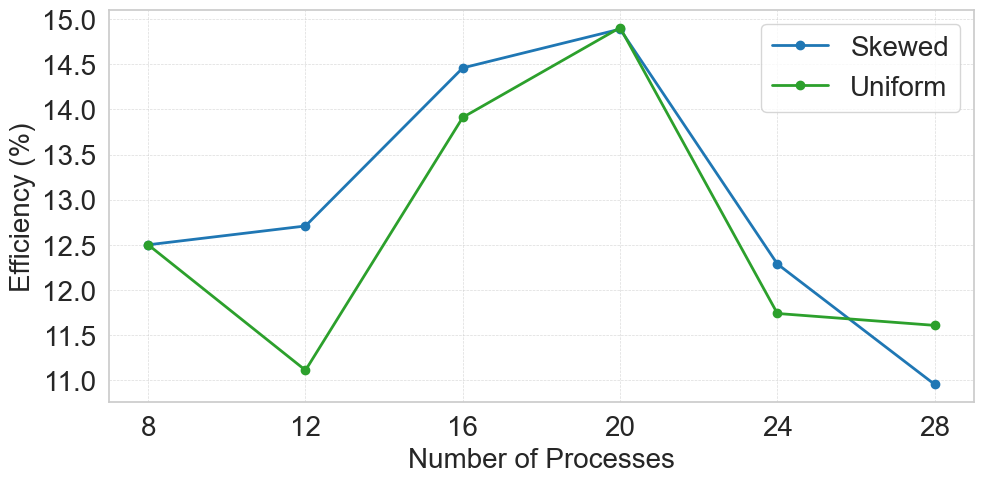

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = {
    'Processes': [8, 12, 16, 20, 24, 28],
    'skewed': [157.79673, 103.47145, 68.20336, 52.98837, 53.51012, 51.45277],

    'uniform': [134.87319, 101.16788, 60.59216, 45.24024, 47.87232, 41.4997],
}


df = pd.DataFrame(data)


def calculate_metrics(df, method_column):

    baseline_time = df[df['Processes'] == 8][method_column].values[0]
    df[f'{method_column}_Speedup'] = baseline_time / df[method_column]
    df[f'{method_column}_Efficiency'] = (df[f'{method_column}_Speedup'] / df['Processes']) * 100
    return df


methods = ['skewed', 'uniform', ]

for method in methods:
    df = calculate_metrics(df, method)

sns.set(style="whitegrid")

palette = {
    'skewed': 'tab:blue',
    'uniform': 'tab:green',
}


plt.figure(figsize=(10, 5))


for method in methods:
    efficiency_column = f'{method}_Efficiency'
    plt.plot(
        df['Processes'], 
        df[efficiency_column], 
        marker='o', 
        label=method.replace('-', ' ').capitalize(), 
        color=palette[method],
        linewidth=2
    )


plt.xlabel('Number of Processes', fontsize=20)
plt.ylabel('Efficiency (%)', fontsize=20)



plt.xticks(df['Processes'], fontsize=20) 
plt.yticks( fontsize=20) 

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.legend(title='', fontsize=20, title_fontsize=30)

plt.tight_layout()
plt.savefig("./c3_motivation_efficiency.pdf", dpi=300, bbox_inches='tight')

plt.show()